<a href="https://colab.research.google.com/github/Diwash17/Mother-vs-Child-IQ/blob/main/Childvsmother_iq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

In [134]:
df1=pd.read_csv('/content/kid_iq.csv')
df2=pd.read_csv('/content/child_iq.csv')

In [135]:
df1.head()

,Unnamed: 0,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,1,65,1,121.117529,4,27
1,2,98,1,89.361882,4,25
2,3,85,1,115.443165,4,27
3,4,83,1,99.449639,3,25
4,5,115,1,92.745710,4,27


In [136]:
df2.head()

,Unnamed: 0,ppvt,educ_cat,momage
0,1,120,2,21
1,2,89,1,17
2,3,78,2,19
3,4,42,1,20
4,5,115,4,26


In [137]:
df1.shape

(434, 6)

In [138]:
df2.shape

(400, 4)

In [139]:
df1.rename(columns={df1.columns[0]: 'Unnamed: 0'}, inplace=True)
df2.rename(columns={df2.columns[0]: 'Unnamed: 0'}, inplace=True)
df1.drop(['Unnamed: 0'], axis=1, inplace=True)
df2.drop(['Unnamed: 0'], axis=1, inplace=True)

In [140]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   kid_score  434 non-null    int64  
 1   mom_hs     434 non-null    int64  
 2   mom_iq     434 non-null    float64
 3   mom_work   434 non-null    int64  
 4   mom_age    434 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 17.1 KB


In [141]:
df1.duplicated().sum()

1

In [142]:
df1.drop_duplicates(inplace=True)

In [143]:
df1.isnull().sum()

kid_score    0
mom_hs       0
mom_iq       0
mom_work     0
mom_age      0
dtype: int64

In [144]:
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
kid_score,433.0,86.757506,20.417491,20.000000,74.000000,90.000000,102.000000,144.000000
mom_hs,433.0,0.785219,0.411145,0.000000,1.000000,1.000000,1.000000,1.000000
mom_iq,433.0,99.943384,14.970855,71.037405,88.660321,97.915254,110.096806,138.893106
mom_work,433.0,2.893764,1.181565,1.000000,2.000000,3.000000,4.000000,4.000000
mom_age,433.0,22.785219,2.704174,17.000000,21.000000,23.000000,25.000000,29.000000


In [145]:
df1.columns.tolist()

['kid_score', 'mom_hs', 'mom_iq', 'mom_work', 'mom_age']

In [146]:
df1.nunique()

kid_score     85
mom_hs         2
mom_iq       332
mom_work       4
mom_age       13
dtype: int64

In [147]:
df1.iloc[100]

kid_score     93.000000
mom_hs         1.000000
mom_iq       121.117529
mom_work       4.000000
mom_age       27.000000
Name: 100, dtype: float64

In [148]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   ppvt      400 non-null    int64
 1   educ_cat  400 non-null    int64
 2   momage    400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [149]:
df2.duplicated().sum()

50

In [150]:
df2.drop_duplicates(inplace=True)

In [151]:
df2.isnull().sum()

ppvt        0
educ_cat    0
momage      0
dtype: int64

In [152]:
discrete_variable=[]
continous_variable=[]
for i in df1.columns:
  unique_values=df1[i].nunique()
  total_values=df1.shape[0]
  if unique_values/total_values<0.05 or unique_values<10:
    discrete_variable.append(i)
  else:
    continous_variable.append(i)


In [153]:
print(f'Discrete Variable: {discrete_variable}')
print(f'Continous Variable: {continous_variable}')

Discrete Variable: ['mom_hs', 'mom_work', 'mom_age']
Continous Variable: ['kid_score', 'mom_iq']


In [154]:
discrete_variable=[]
continous_variable=[]
for i in df2.columns:
  unique_values=df2[i].nunique()
  total_values=df2.shape[0]
  if unique_values/total_values<0.05 or unique_values<10:
    discrete_variable.append(i)
  else:
    continous_variable.append(i)


In [155]:
print(f'Discrete Variable: {discrete_variable}')
print(f'Continous Variable: {continous_variable}')

Discrete Variable: ['educ_cat', 'momage']
Continous Variable: ['ppvt']


In [156]:
df1.sample()


,kid_score,mom_hs,mom_iq,mom_work,mom_age
153,81,1,115.375267,4,26


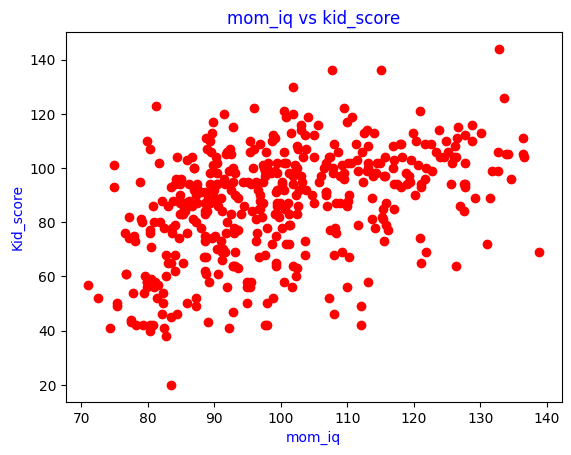

In [157]:
plt.scatter(df1['mom_iq'],df1['kid_score'],color='red')
plt.xlabel('mom_iq',color='blue')
plt.ylabel('Kid_score',color='blue')
plt.title('mom_iq vs kid_score',color='blue')
plt.show()


In [158]:
df1['mom_iq'].corr(df1['kid_score'],method='pearson')

0.44683720280130246

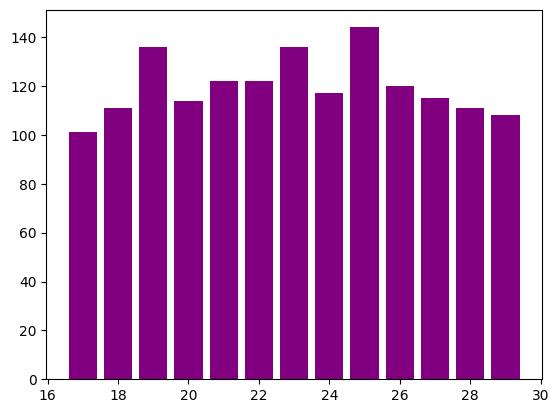

In [159]:
plt.bar(df1['mom_age'],df1['kid_score'],color='purple')
plt.show()


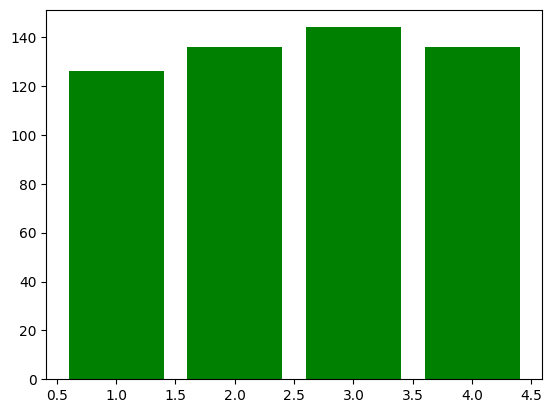

In [160]:
plt.bar(df1['mom_work'],df1['kid_score'],color='green')
plt.show()

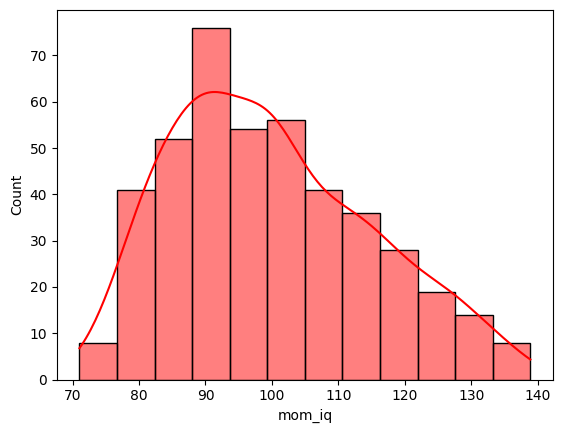

In [161]:
sns.histplot(data=df1,x=df1['mom_iq'],color='red',kde=True)
plt.show()

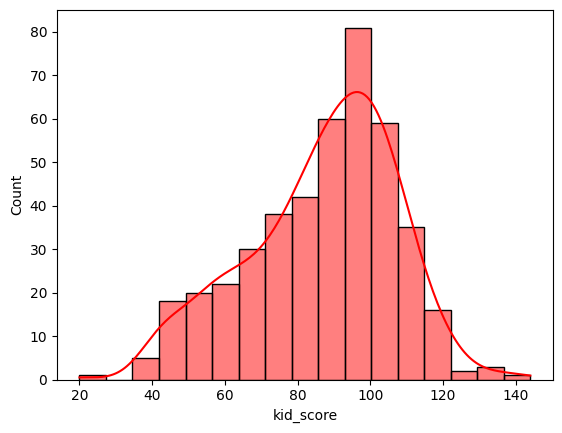

In [162]:
sns.histplot(data=df1,x=df1['kid_score'],color='red',kde=True)
plt.show()

In [163]:
df1.corr(method='pearson').transpose()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
kid_score,1.000000,0.236167,0.446837,0.085863,0.091920
mom_hs,0.236167,1.000000,0.281697,0.253118,0.214502
mom_iq,0.446837,0.281697,1.000000,0.111727,0.091593
mom_work,0.085863,0.253118,0.111727,1.000000,0.135564
mom_age,0.091920,0.214502,0.091593,0.135564,1.000000


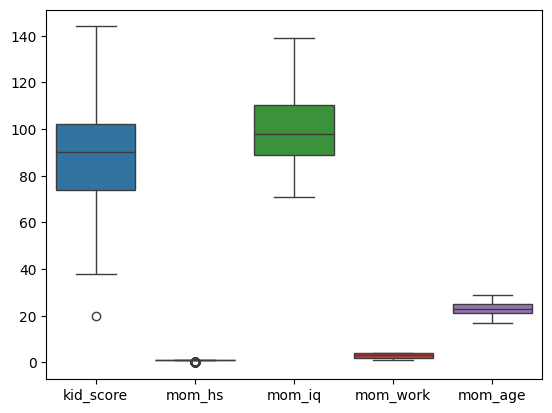

In [164]:
sns.boxplot(df1)
plt.show()

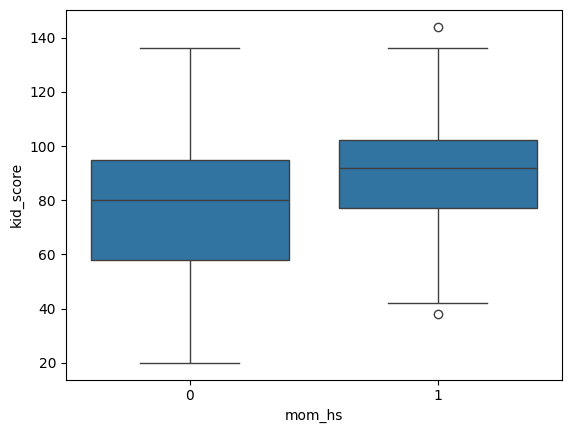

In [165]:
sns.boxplot(data=df1,x='mom_hs',y='kid_score')
plt.show()

In [166]:
df1['mom_hs'].value_counts()

mom_hs
1    340
0     93
Name: count, dtype: int64

In [167]:
df1['mom_work'].value_counts()

mom_work
4    204
2     96
1     77
3     56
Name: count, dtype: int64

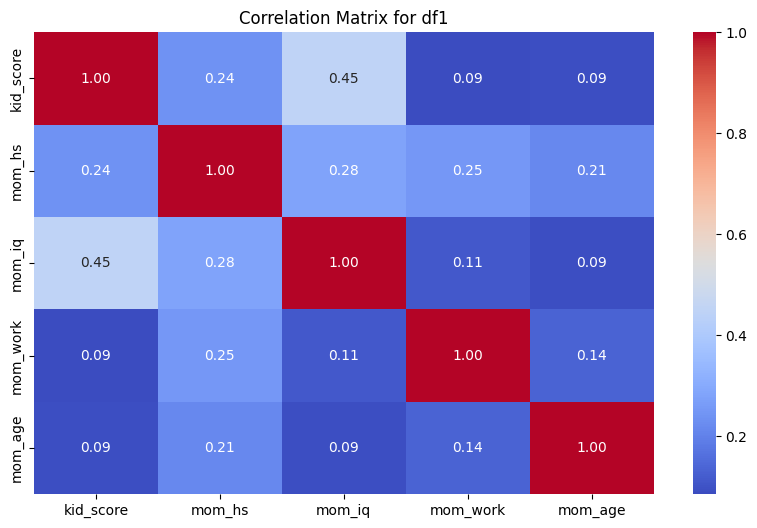

In [168]:
correlation_matrix_df1 = df1.corr(method='pearson')
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix_df1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for df1')
plt.show()


In [169]:
df2.sample(5)

,ppvt,educ_cat,momage
243,113,3,24
23,102,2,22
342,42,2,25
156,49,1,23
14,78,3,26


In [170]:
df2.shape

(350, 3)

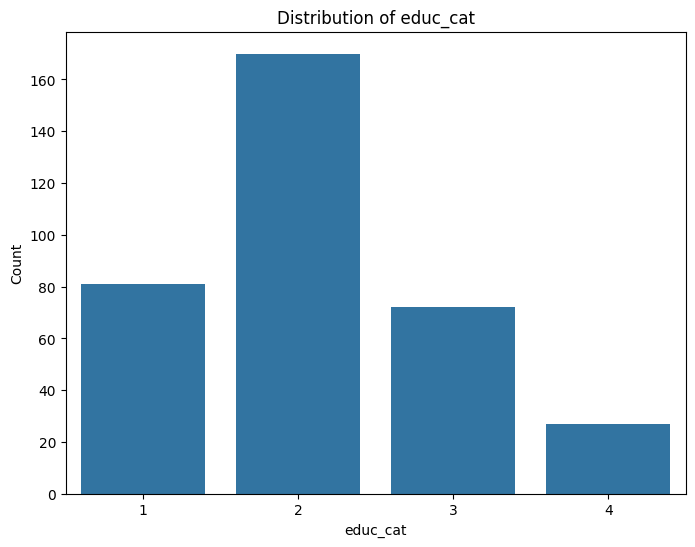

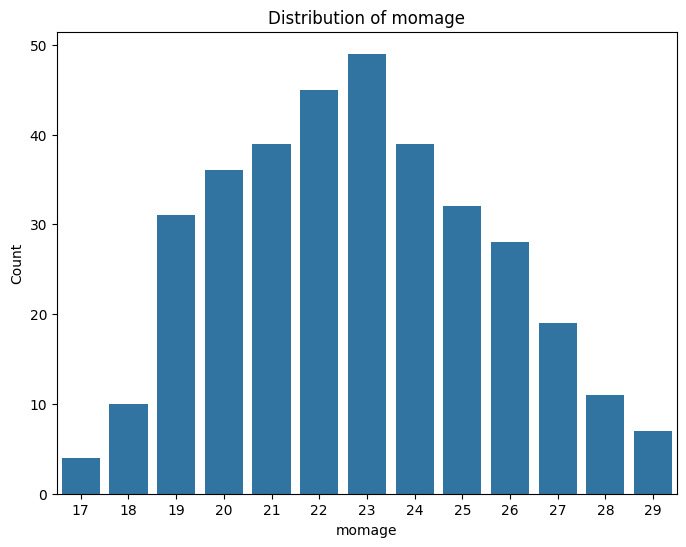

In [171]:
for i in discrete_variable:
  plt.figure(figsize=(8, 6))
  sns.countplot(x=i, data=df2)
  plt.title(f'Distribution of {i}')
  plt.xlabel(i)
  plt.ylabel('Count')
  plt.show()

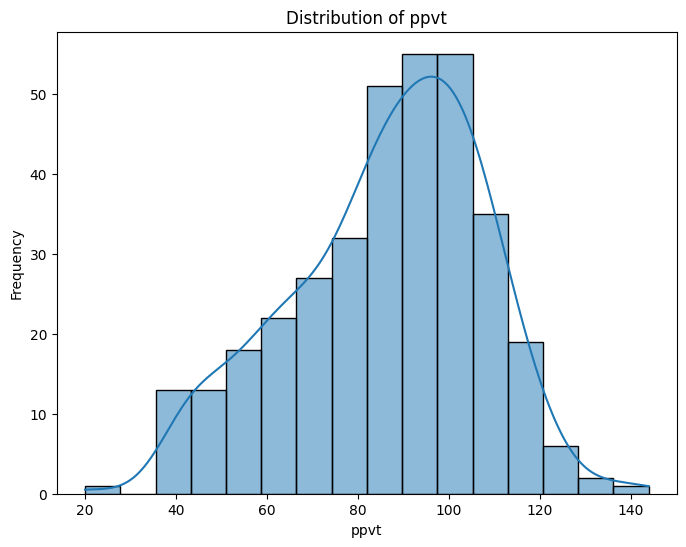

In [172]:
for i in continous_variable:
  plt.figure(figsize=(8, 6))
  sns.histplot(df2[i], kde=True)
  plt.title(f'Distribution of {i}')
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.show()

In [173]:
df1.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27


In [174]:
df2.head()

,ppvt,educ_cat,momage
0,120,2,21
1,89,1,17
2,78,2,19
3,42,1,20
4,115,4,26


In [175]:
df2.rename(columns={'momage': 'mom_age'}, inplace=True)

In [176]:
df_merged=pd.merge(df1,df2,on='mom_age',how='inner')

In [177]:
df_merged.sample()

,kid_score,mom_hs,mom_iq,mom_work,mom_age,ppvt,educ_cat
7342,109,1,122.601042,4,24,88,2


In [178]:
df_merged.shape

(15209, 7)

In [179]:
df_merged.columns

Index(['kid_score', 'mom_hs', 'mom_iq', 'mom_work', 'mom_age', 'ppvt',
       'educ_cat'],
      dtype='object')

In [180]:
df_merged.duplicated().sum()

0

In [181]:
df_merged.isnull().sum()

kid_score    0
mom_hs       0
mom_iq       0
mom_work     0
mom_age      0
ppvt         0
educ_cat     0
dtype: int64

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [183]:
X=df_merged.drop('kid_score',axis=1)
y=df_merged['kid_score']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)



In [184]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (12167, 6)
X_test shape: (3042, 6)
y_train shape: (12167,)
y_test shape: (3042,)


In [185]:
lr=LinearRegression()

In [186]:
lr.fit(X_train,y_train)

LinearRegression()

In [187]:
y_pred=lr.predict(X_test)

In [188]:
X_test

,mom_hs,mom_iq,mom_work,mom_age,ppvt,educ_cat
1768,0,92.139716,1,18,41,1
2019,1,95.389651,1,20,56,3
2805,1,120.609045,3,20,69,3
937,1,96.927700,3,25,42,2
7615,1,84.141466,4,24,88,2
...,...,...,...,...,...,...
3387,1,99.925725,4,23,92,2
2182,0,96.650621,4,20,89,2
3728,1,89.837967,4,23,112,2
11737,1,103.791958,4,21,92,3


In [189]:
y_test

1768      41
2019      56
2805     101
937      109
7615      68
        ... 
3387      87
2182      85
3728      92
11737     92
3721      92
Name: kid_score, Length: 3042, dtype: int64

In [190]:
m=lr.coef_
c=lr.intercept_

In [191]:
m

array([ 6.578536  ,  0.59397282, -0.58793607,  0.40504339,  0.01521077,
       -0.17371782])

In [193]:
c

13.82428359415887

In [194]:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 307.2657563360359
R-squared: 0.2092501574568263


In [195]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)